In [36]:
!pip install joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,classification_report,f1_score,roc_auc_score,precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from joblib import dump,load
from sklearn.compose import ColumnTransformer

df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
print(df.head(10))

Defaulting to user installation because normal site-packages is not writeable
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   
7   30        No      Travel_Rarely       1358  Research & Development   
8   38        No  Travel_Frequently        216  Research & Development   
9   36        No      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1        


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: C:\Python313\python.exe -m pip install --upgrade pip


In [37]:
print("="*20,"Data Information","="*20)
print(df.info())
print("="*20,"Data Description","="*20)
print(df.describe())
print("="*20,"Dataset Shape","="*20)
print(df.shape)
print("="*20,"Identifying and Removing null values","="*20)
print(df.isna())
print(df.dropna())



==================== Data Information ====================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement     

In [38]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [39]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return outliers, lower_bound, upper_bound

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


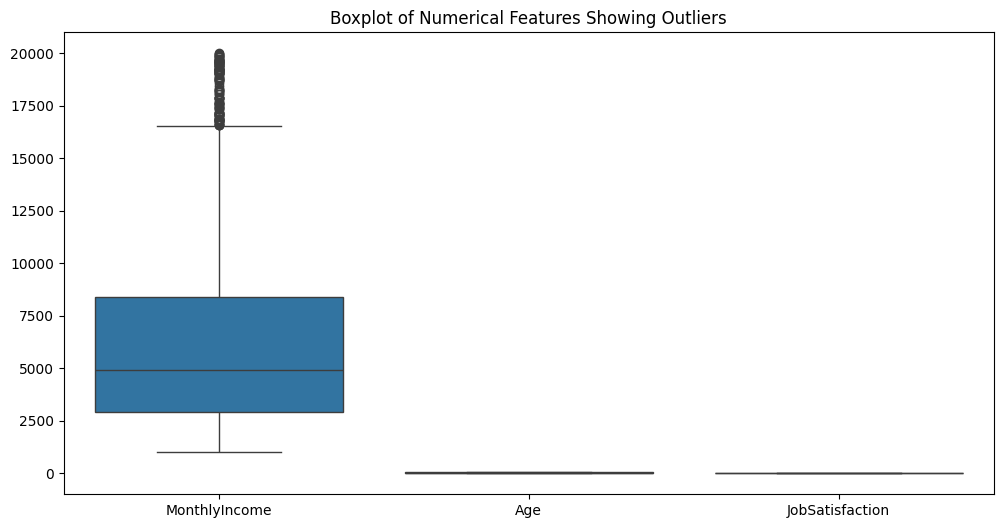

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['MonthlyIncome', 'Age', 'JobSatisfaction']])
plt.title("Boxplot of Numerical Features Showing Outliers")
plt.show()


In [41]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
cat_cols = df.select_dtypes(include="object").columns

# Dictionary to store label encoding mappings
label_encodings = {}

print("======= Label Encoding Table =======")
for col in cat_cols:
    le = LabelEncoder()
    df[col + "_encoded"] = le.fit_transform(df[col])
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    label_encodings[col] = mapping
    
    # Display mapping for this column
    print(f"\nColumn: {col}")
    for key, val in mapping.items():
        print(f"  {key} -> {val}")

# Optionally, convert the dictionary to a DataFrame for a nice table view
import pandas as pd

all_mappings = []
for col, mapping in label_encodings.items():
    for key, val in mapping.items():
        all_mappings.append([col, key, val])

label_encoding_df = pd.DataFrame(all_mappings, columns=["Feature", "Category", "Encoded Value"])
print("\nFull Label Encoding Table:")
print(label_encoding_df)


======= Label Encoding Table =======

Column: Attrition
  No -> 0
  Yes -> 1

Column: BusinessTravel
  Non-Travel -> 0
  Travel_Frequently -> 1
  Travel_Rarely -> 2

Column: Department
  Human Resources -> 0
  Research & Development -> 1
  Sales -> 2

Column: EducationField
  Human Resources -> 0
  Life Sciences -> 1
  Marketing -> 2
  Medical -> 3
  Other -> 4
  Technical Degree -> 5

Column: Gender
  Female -> 0
  Male -> 1

Column: JobRole
  Healthcare Representative -> 0
  Human Resources -> 1
  Laboratory Technician -> 2
  Manager -> 3
  Manufacturing Director -> 4
  Research Director -> 5
  Research Scientist -> 6
  Sales Executive -> 7
  Sales Representative -> 8

Column: MaritalStatus
  Divorced -> 0
  Married -> 1
  Single -> 2

Column: Over18
  Y -> 0

Column: OverTime
  No -> 0
  Yes -> 1

Full Label Encoding Table:
           Feature                   Category  Encoded Value
0        Attrition                         No              0
1        Attrition                     

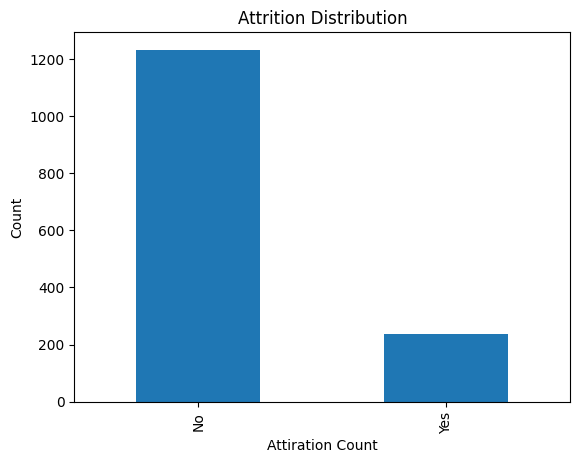

In [42]:
plt.Figure()
df["Attrition"].value_counts().plot(kind="bar")
plt.xlabel("Attiration Count")
plt.ylabel("Count")
plt.title("Attrition Distribution")
plt.show()

In [43]:
type(df)

X = df[["MonthlyIncome", "Age", "JobSatisfaction","Department","Education","Gender"]]
y = df["Attrition"]


In [44]:
cat_cols=df.select_dtypes(include="object")
num_cols=df.select_dtypes(include="number")

for col in cat_cols:
    print(f"\nCategorical Columns:{col}vs Attrition")
    print(pd.crosstab(df[col],y,margins=True,normalize="index"))


Categorical Columns:Attritionvs Attrition
Attrition        No       Yes
Attrition                    
No         1.000000  0.000000
Yes        0.000000  1.000000
All        0.838776  0.161224

Categorical Columns:BusinessTravelvs Attrition
Attrition                No       Yes
BusinessTravel                       
Non-Travel         0.920000  0.080000
Travel_Frequently  0.750903  0.249097
Travel_Rarely      0.850431  0.149569
All                0.838776  0.161224

Categorical Columns:Departmentvs Attrition
Attrition                     No       Yes
Department                                
Human Resources         0.809524  0.190476
Research & Development  0.861602  0.138398
Sales                   0.793722  0.206278
All                     0.838776  0.161224

Categorical Columns:EducationFieldvs Attrition
Attrition               No       Yes
EducationField                      
Human Resources   0.740741  0.259259
Life Sciences     0.853135  0.146865
Marketing         0.779874  0.220

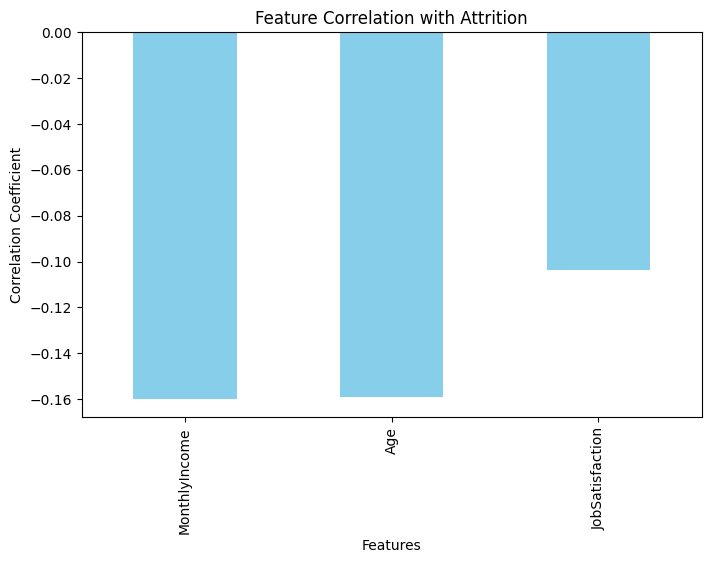

In [45]:
df_corr = df.copy()
df_corr['Attrition_encoded'] = df_corr['Attrition'].map({'No': 0, 'Yes': 1})

# Select only numeric columns for correlation
numeric_cols = ['MonthlyIncome', 'Age', 'JobSatisfaction', 'Attrition_encoded']

correlations = df_corr[numeric_cols].corr()['Attrition_encoded'].drop('Attrition_encoded')

# Plot as bar chart
plt.figure(figsize=(8,5))
correlations.sort_values().plot(kind='bar', color='skyblue')
plt.title("Feature Correlation with Attrition")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.show()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
	X, y, train_size=0.7, random_state=42, stratify=y
)

In [47]:
# preprocessor = ColumnTransformer(
#     transformers=[
#         ("num", StandardScaler(), num_cols.columns.tolist()),
#         ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols.columns.tolist())
#     ]
# )

# X_train_processed = preprocessor.fit_transform(X_train)
# X_test_processed = preprocessor.transform(X_test)
# Define the correct columns for your feature set X
numeric_features = ["MonthlyIncome", "Age", "JobSatisfaction", "Education"]
categorical_features = ["Department", "Gender"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [48]:
models={
    "Logistic Regression":LogisticRegression(max_iter=1000),
    "Decision Tree":DecisionTreeClassifier(max_depth=10,random_state=42),
    "Random Forest":RandomForestClassifier(n_estimators=100,random_state=42),
    "SVM": SVC(kernel="rbf",probability=True)
}


In [49]:
# result = []

# print("================Model Prediction================")

# for name, model in models.items():
#     # Use scaled data for all models since you already scaled X_train and X_test
#     model.fit(X_train_scaled, y_train)
#     y_pred = model.predict(X_test_scaled)
#     # Some models (like SVC with probability=True) have predict_proba, others may not
#     if hasattr(model, "predict_proba"):
#         y_prob = model.predict_proba(X_test_scaled)[:, 1]
#     else:
#         # For models without predict_proba, use decision_function or fallback
#         if hasattr(model, "decision_function"):
#             y_prob = model.decision_function(X_test_scaled)
#         else:
#             y_prob = None  # or np.zeros_like(y_pred) if you want to avoid errors

# result.append([
#         name,
#         accuracy_score(y_test, y_pred),
#         precision_score(y_test, y_pred, pos_label="Yes"),
#         recall_score(y_test, y_pred, pos_label="Yes"),
#         f1_score(y_test, y_pred, pos_label="Yes"),
#         roc_auc_score((y_test == "Yes").astype(int),y_prob)
#     ])

# print(f"{name} completed")

result = []

print("================Model Prediction================")

for name, model in models.items():
    # Use processed (scaled + encoded) data for all models
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    # Some models (like SVC with probability=True) have predict_proba, others may not
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_processed)[:, 1]
    else:
        # For models without predict_proba, use decision_function or fallback
        if hasattr(model, "decision_function"):
            y_prob = model.decision_function(X_test_processed)
        else:
            y_prob = None  # or np.zeros_like(y_pred) if you want to avoid errors

    result.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, pos_label="Yes"),
        recall_score(y_test, y_pred, pos_label="Yes"),
        f1_score(y_test, y_pred, pos_label="Yes"),
        roc_auc_score((y_test == "Yes").astype(int), y_prob)
    ])

    print(f"{name} completed")

================Model Prediction================
Logistic Regression completed
Decision Tree completed
Random Forest completed
SVM completed


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [50]:
final_model = VotingClassifier(
    estimators=[
        ("lr", LogisticRegression(max_iter=1000)),
        ("dt", DecisionTreeClassifier(max_depth=10, random_state=42)),
        ("rf", RandomForestClassifier(n_estimators=100, random_state=42))
    ],
    voting="soft"
)

final_model.fit(X_train_processed, y_train)


,estimators,"[('lr', ...), ('dt', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [51]:
results_df=pd.DataFrame(
    result,
    columns=["Model","Accuracy","Precision","Recall","F1 Score","ROC-AUC"]
)
print("====================Final Prediction====================")
print(results_df)

====================Final Prediction====================
                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Logistic Regression  0.839002   0.500000  0.014085  0.027397  0.666997
1        Decision Tree  0.755102   0.239437  0.239437  0.239437  0.549848
2        Random Forest  0.807256   0.250000  0.098592  0.141414  0.621545
3                  SVM  0.839002   0.000000  0.000000  0.000000  0.601865


In [52]:
# # def GetDataForPrediction():
# #     print("\nInputs")
    
# #     Monthly_Income = float(input("Enter your monthly income:"))
# #     data = pd.DataFrame(
# #         [[Monthly_Income]],
# #         columns=["MonthlyIncome"]
# #     )
# #     return data

# # new_employee = GetDataForPrediction()

# # new_employee_scaled=scaler.fit_transform(new_employee)

# # attrition_pred=final_model.predict(new_employee_scaled)[0]

# # attrition_prob=final_model.predict_proba(new_employee_scaled)[0][1]

# # print("=====Attrition Prediction=======")

# # print("Will Employee Leave?",attrition_pred)

# # print(f"Probability of Leaving:{attrition_prob:.2f}")

# def get_int(prompt):
#     while True:
#         value = input(prompt)
#         if value.strip().isdigit():
#             return int(value)
#         print("❌ Please enter a valid integer.")

# def get_float(prompt):
#     while True:
#         value = input(prompt)
#         try:
#             return float(value)
#         except ValueError:
#             print("❌ Please enter a valid number.")

# def get_int(prompt):
#     while True:
#         value = input(prompt).strip()
#         if value.isdigit():
#             return int(value)
#         print("❌ Please enter a valid integer.")

# def get_float(prompt):
#     while True:
#         value = input(prompt).strip()
#         try:
#             return float(value)
#         except ValueError:
#             print("❌ Please enter a valid number.")

# def GetDataForPrediction():
#     data = {
#         "MonthlyIncome": [float(input("Monthly Income: "))],
#         "Age": [int(input("Age: "))],
#         "JobSatisfaction": [int(input("Job Satisfaction (1-4): "))],
#         "Department": [input("Department: ")],
#         "Education": [input("Education: ")],
#         "Gender": [input("Gender: ")]
#     }
#     return pd.DataFrame(data)

# import numpy as np

# employee = GetDataForPrediction()
# employee.replace("", np.nan, inplace=True)

# # Convert numeric columns to correct type
# employee["MonthlyIncome"] = pd.to_numeric(employee["MonthlyIncome"], errors="coerce")
# employee["Age"] = pd.to_numeric(employee["Age"], errors="coerce")
# employee["JobSatisfaction"] = pd.to_numeric(employee["JobSatisfaction"], errors="coerce")

# # Ensure all expected columns exist
# expected_cols = [
#     "MonthlyIncome",
#     "Age",
#     "JobSatisfaction",
#     "Department",
#     "Education",
#     "Gender"
# ]
# for col in expected_cols:
#     if col not in employee.columns:
#         employee[col] = np.nan

# employee = employee[expected_cols]

# # Fill missing values with a default or most frequent value from training data
# for col in employee.columns:
#     if employee[col].isnull().any():
#         if col in X_train.columns:
#             # Use mode for categorical, median for numeric
#             if X_train[col].dtype == "O":
#                 employee[col].fillna(X_train[col].mode()[0], inplace=True)
#             else:
#                 employee[col].fillna(X_train[col].median(), inplace=True)
#         else:
#             employee[col].fillna(0, inplace=True)

# # Encode categorical columns using label_encodings
# for col in ["Department", "Education", "Gender"]:
#     if col in employee.columns:
#         mapping = label_encodings.get(col, {})
#         employee[col] = employee[col].map(mapping)
#         # If mapping fails (unknown value), fill with mode from X_train
#         if employee[col].isnull().any() and col in X_train.columns:
#             employee[col].fillna(X_train[col].mode()[0], inplace=True)

# new_employee_preprocessed = preprocessor.transform(employee)

# attrition_prediction = final_model.predict(new_employee_preprocessed)[0]
# attrition_prediction_probability = final_model.predict_proba(new_employee_preprocessed)[0][1]
# print("Will Employee Leave?", attrition_prediction)
# print("What is the probability", attrition_prediction_probability)
# def GetDataForPrediction():
#     print("\nInputs")
    
#     Monthly_Income = float(input("Enter your monthly income:"))
#     data = pd.DataFrame(
#         [[Monthly_Income]],
#         columns=["MonthlyIncome"]
#     )
#     return data

# new_employee = GetDataForPrediction()

# new_employee_scaled=scaler.fit_transform(new_employee)

# attrition_pred=final_model.predict(new_employee_scaled)[0]

# attrition_prob=final_model.predict_proba(new_employee_scaled)[0][1]

# print("=====Attrition Prediction=======")

# print("Will Employee Leave?",attrition_pred)

# print(f"Probability of Leaving:{attrition_prob:.2f}")








# def get_int(prompt):
#     while True:
#         value = input(prompt)
#         if value.strip().isdigit():
#             return int(value)
#         print("❌ Please enter a valid integer.")

# def get_float(prompt):
#     while True:
#         value = input(prompt)
#         try:
#             return float(value)
#         except ValueError:
#             print("❌ Please enter a valid number.")

# def get_int(prompt):
#     while True:
#         value = input(prompt).strip()
#         if value.isdigit():
#             return int(value)
#         print("❌ Please enter a valid integer.")

# def get_float(prompt):
#     while True:
#         value = input(prompt).strip()
#         try:
#             return float(value)
#         except ValueError:
#             print("❌ Please enter a valid number.")

# def GetDataForPrediction():
#     data = {
# "MonthlyIncome": [get_float("Monthly Income: ")],
# "Age": [get_int("Age: ")],
#         "JobSatisfaction": [get_int("Job Satisfaction (1-4): ")],
#         "Department": [input("Department: ").strip()],
#         "Education": [input("Education: ").strip()],
#         "Gender": [input("Gender: ").strip()]
#     }
#     return pd.DataFrame(data)

# import numpy as np

# employee = GetDataForPrediction()
# employee.replace("", np.nan, inplace=True)

# # Convert numeric columns to correct type
# employee["MonthlyIncome"] = pd.to_numeric(employee["MonthlyIncome"], errors="coerce")
# employee["Age"] = pd.to_numeric(employee["Age"], errors="coerce")
# employee["JobSatisfaction"] = pd.to_numeric(employee["JobSatisfaction"], errors="coerce")

# # Ensure all expected columns exist
# expected_cols = [
#     "MonthlyIncome",
#     "Age",
#     "JobSatisfaction",
#     "Department",
#     "Education",
#     "Gender"
# ]
# for col in expected_cols:
#     if col not in employee.columns:
#         employee[col] = np.nan

# employee = employee[expected_cols]

# # Fill missing values with a default or most frequent value from training data
# for col in employee.columns:
#     if employee[col].isnull().any():
#         if col in X_train.columns:
#             # Use mode for categorical, median for numeric
#             if X_train[col].dtype == "O":
#                 employee[col].fillna(X_train[col].mode()[0], inplace=True)
#             else:
#                 employee[col].fillna(X_train[col].median(), inplace=True)
#         else:
#             employee[col].fillna(0, inplace=True)

# # Encode categorical columns using label_encodings
# for col in ["Department", "Education", "Gender"]:
#     if col in employee.columns:
#         mapping = label_encodings.get(col, {})
#         employee[col] = employee[col].map(mapping)
#         # Convert to numeric to avoid isnan errors
#         employee[col] = pd.to_numeric(employee[col], errors='coerce')
#         # If mapping fails (unknown value), fill with mode from X_train
#         if employee[col].isnull().any() and col in X_train.columns:
#             # Use mode from X_train (already encoded)
#             employee[col].fillna(X_train[col].mode()[0], inplace=True)

# new_employee_preprocessed = preprocessor.transform(employee)

# attrition_prediction = final_model.predict(new_employee_preprocessed)[0]
# attrition_prediction_probability = final_model.predict_proba(new_employee_preprocessed)[0][1]
# print("Will Employee Leave?", attrition_prediction)
# print("What is the probability", attrition_prediction_probability)
import pandas as pd
import numpy as np

# -------------------------------
# Input helpers
# -------------------------------
def get_int(prompt):
    while True:
        value = input(prompt).strip()
        if value.isdigit():
            return int(value)
        print("❌ Please enter a valid integer.")

def get_float(prompt):
    while True:
        value = input(prompt).strip()
        try:
            return float(value)
        except ValueError:
            print("❌ Please enter a valid number.")

# -------------------------------
# Collect user input (RAW DATA)
# -------------------------------
def GetDataForPrediction():
    data = {
        "MonthlyIncome": [get_float("Monthly Income: ")],
        "Age": [get_int("Age: ")],
        "JobSatisfaction": [get_int("Job Satisfaction (1-4): ")],
        "Department": [input("Department: ").strip()],
        "Education": [input("Education: ").strip()],
        "Gender": [input("Gender: ").strip()]
    }
    return pd.DataFrame(data)

# -------------------------------
# Prediction pipeline
# -------------------------------
employee = GetDataForPrediction()

# Replace empty strings with None for categorical columns
for col in ["Department", "Education", "Gender"]:
    if col in employee.columns:
        employee[col] = employee[col].replace("", None).astype("object")

# Fill missing values for categorical columns with mode from X_train
for col in ["Department", "Education", "Gender"]:
    if col in employee.columns and employee[col].isnull().any():
        if col in X_train.columns:
            mode_val = X_train[col].mode()[0]
            employee[col] = employee[col].fillna(mode_val)
        else:
            employee[col] = employee[col].fillna("Unknown")

# Fill missing values for numeric columns with median from X_train
for col in ["MonthlyIncome", "Age", "JobSatisfaction"]:
    if col in employee.columns and employee[col].isnull().any():
        if col in X_train.columns:
            median_val = X_train[col].median()
            employee[col] = employee[col].fillna(median_val)
        else:
            employee[col] = employee[col].fillna(0)

# Ensure correct dtypes
employee["MonthlyIncome"] = pd.to_numeric(employee["MonthlyIncome"], errors="coerce")
employee["Age"] = pd.to_numeric(employee["Age"], errors="coerce")
employee["JobSatisfaction"] = pd.to_numeric(employee["JobSatisfaction"], errors="coerce")
for col in ["Department", "Education", "Gender"]:
    employee[col] = employee[col].astype("object")

# Apply the SAME preprocessor used during training
employee_processed = preprocessor.transform(employee)

# Predict
attrition_pred = final_model.predict(employee_processed)[0]
attrition_prob = final_model.predict_proba(employee_processed)[0][1]

# Output
print("\n===== ATTRITION PREDICTION =====")
print("Will Employee Leave?:", "Yes" if attrition_pred == 1 else "No")
print(f"Probability of Leaving: {attrition_prob:.2f}")




===== ATTRITION PREDICTION =====
Will Employee Leave?: No
Probability of Leaving: 0.12


In [53]:
print("\n=== RAW EMPLOYEE DATA ===")
print(employee)
print("\n=== DTYPES ===")
print(employee.dtypes)



=== RAW EMPLOYEE DATA ===
   MonthlyIncome  Age  JobSatisfaction Department Education Gender
0        20000.0   21                3          2         1      1

=== DTYPES ===
MonthlyIncome      float64
Age                  int64
JobSatisfaction      int64
Department          object
Education           object
Gender              object
dtype: object


In [54]:
from joblib import dump
dump(final_model, "Attrition_detection_model.pkl")

# dump(Scaler, "Scaler.pkl")

dump(X.columns.tolist(), "feature_names.pkl")

print("\nModel, Scaler and Feature name Saved Successfully!")


Model, Scaler and Feature name Saved Successfully!


In [55]:
# %pip install streamlit
# import streamlit as st
# import pandas as pd
# import joblib

# # Load trained model and scaler
# model = joblib.load("Attrition_detection_model.pkl")
# scaler = joblib.load("scaler.pkl")

# st.set_page_config(page_title="Employee Attrition Predictor", layout="centered")

# st.title("📉 Employee Attrition Prediction")
# st.write("Predict whether an employee is likely to leave the company.")

# # User Input
# monthly_income = st.number_input(
#     "Monthly Income",
#     min_value=0.0,
#     step=500.0
# )

# if st.button("Predict Attrition"):
#     input_df = pd.DataFrame(
#         [[monthly_income]],
#         columns=["MonthlyIncome"]
#     )

#     input_scaled = scaler.transform(input_df)

#     prediction = model.predict(input_scaled)[0]
#     probability = model.predict_proba(input_scaled)[0][1]

#     if prediction == "Yes":
#         st.error(f"⚠️ Employee likely to leave (Risk: {probability:.2%})")
#     else:
#         st.success(f"✅ Employee likely to stay (Risk: {probability:.2%})")

# %pip install streamlit

# import streamlit as st
# import pandas as pd
# import joblib
# import numpy as np

# # Load full pipeline (preprocessor + model)
# pipeline = joblib.load("Attrition_detection_model.pkl")

# st.set_page_config(
#     page_title="Employee Attrition Predictor",
#     layout="centered"
# )

# st.title("📉 Employee Attrition Prediction")
# st.write("Predict whether an employee is likely to leave the company.")

# # =======================
# # USER INPUTS
# # =======================

# monthly_income = st.number_input(
#     "Monthly Income",
#     min_value=0.0,
#     step=500.0
# )

# age = st.number_input(
#     "Age",
#     min_value=18,
#     max_value=65,
#     step=1
# )

# job_satisfaction = st.selectbox(
#     "Job Satisfaction (1 = Low, 4 = High)",
#     [1, 2, 3, 4]
# )

# department = st.selectbox(
#     "Department",
#     ["Sales", "Research & Development", "Human Resources"]
# )

# education = st.selectbox(
#     "Education Level",
#     ["Below College", "College", "Bachelor", "Master", "Doctor"]
# )

# gender = st.selectbox(
#     "Gender",
#     ["Male", "Female"]
# )

# # =======================
# # PREDICTION
# # =======================

# if st.button("Predict Attrition"):

#     input_df = pd.DataFrame({
#         "MonthlyIncome": [monthly_income],
#         "Age": [age],
#         "JobSatisfaction": [job_satisfaction],
#         "Department": [department],
#         "Education": [education],
#         "Gender": [gender]
#     })

#     # safety: handle empty strings
#     input_df.replace("", np.nan, inplace=True)

#     prediction = pipeline.predict(input_df)[0]
#     probability = pipeline.predict_proba(input_df)[0][1]

#     st.subheader("Result")

#     if prediction == "Yes":
#         st.error(f"⚠️ Employee likely to leave\n\nRisk: **{probability:.2%}**")
#     else:
#         st.success(f"✅ Employee likely to stay\n\nRisk: **{probability:.2%}**")
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# Load full trained pipeline (preprocessor + model)
pipeline = joblib.load("Attrition_detection_model.pkl")

st.set_page_config(
    page_title="Employee Attrition Detection System",
    layout="centered"
)

st.title("📉 Employee Attrition Detection System")
st.write("Predict whether an employee is likely to leave the company.")

st.subheader("Enter Employee Details")

monthly_income = st.number_input(
    "Monthly Income",
    min_value=0.0,
    step=500.0
)

age = st.number_input(
    "Age",
    min_value=18,
    max_value=65,
    step=1
)

job_satisfaction = st.selectbox(
    "Job Satisfaction (1 = Low, 4 = High)",
    [1, 2, 3, 4]
)

department = st.selectbox(
    "Department",
    ["Sales", "Research & Development", "Human Resources"]
)

education = st.selectbox(
    "Education Level",
    ["Below College", "College", "Bachelor", "Master", "Doctor"]
)

gender = st.selectbox(
    "Gender",
    ["Male", "Female"]
)

if st.button("Predict Attrition"):

    input_data = pd.DataFrame({
        "MonthlyIncome": [monthly_income],
        "Age": [age],
        "JobSatisfaction": [job_satisfaction],
        "Department": [department],
        "Education": [education],
        "Gender": [gender]
    })

    input_data.replace("", np.nan, inplace=True)

    prediction = pipeline.predict(input_data)[0]
    probability = pipeline.predict_proba(input_data)[0][1]

    st.subheader("Prediction Result")

    if prediction == "Yes":
        st.error(f"⚠️ Employee likely to leave\n\nRisk Probability: **{probability:.2%}**")
    else:
        st.success(f"✅ Employee likely to stay\n\nRisk Probability: **{probability:.2%}**")


2026-01-30 12:37:43.676 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-30 12:37:43.676 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-30 12:37:43.676 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-30 12:37:43.676 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-30 12:37:43.676 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-30 12:37:43.676 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-30 12:37:43.676 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-30 12:37:43.683 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar